<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/notebooks/titanic_preprocessing_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# load dataset titanic
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
import pandas as pd
# pre-processing, missing values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer

# pipeline
from sklearn.pipeline import Pipeline

# some models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# partition data
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold

# precision metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [18]:

categorical_features = ['pclass', 'sex', 'embarked']
categorical_transformer = Pipeline(
    [
        # ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

numeric_features = ['age', 'sibsp', 'parch', 'fare']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        #('scaler', StandardScaler())
        ('normalizer', Normalizer())
    ]
)

In [19]:

preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop' # By default, only the specified columns in transformers are transformed and combined in the output, and the non-specified columns are dropped.
)


In [20]:

pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=10)) #tree.DecisionTreeClassifier()) # LogisticRegression())
    ]
)


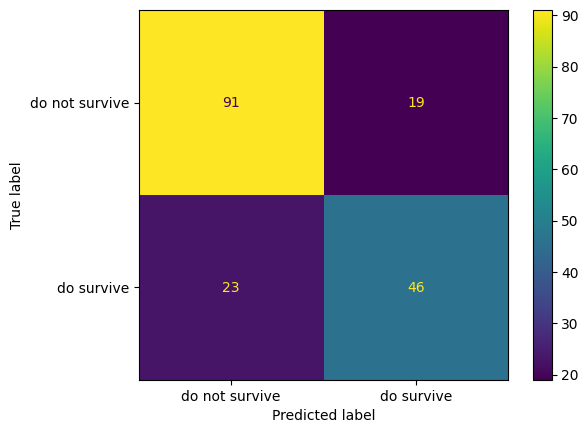

In [22]:
X = df.drop('survived', axis = 1)
y = df.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_test)

# confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred) #actual, predicted
cm_display = ConfusionMatrixDisplay(confusion_matrix = confmat, display_labels = ['do not survive', 'do survive'])
cm_display.plot()
plt.show()